In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/euro-2024-players/euro2024_players.csv


**Uma avaliação dos jogadores da Eurocopa 2024 de futebol a partir de graficos boxplot (diagramas de caixas)**

**Explicação das funções de um Boxplot (diagrama de caixa):**

Um gráfico boxplot (ou diagrama de caixa) é uma ferramenta visual poderosa e eficaz para representar a distribuição de dados numéricos e suas características estatísticas principais. Ele fornece uma visão compacta e clara das seguintes informações sobre um conjunto de dados:

**Estrutura de um Boxplot:**

Um boxplot consiste em vários elementos que juntos ajudam a entender a distribuição dos dados:

**Caixa (Box):**

A caixa representa o intervalo interquartil (IQR), que contém a maioria dos dados (50% dos dados).
A linha no meio da caixa representa a mediana (ou segundo quartil, Q2), que divide os dados em duas metades iguais.

**Hastes (Whiskers):**

As hastes se estendem a partir da caixa até os valores extremos dentro de 1,5 vezes o IQR a partir dos quartis inferior e superior.
Os pontos além das hastes são considerados valores atípicos (outliers) e são representados individualmente.

**Pontos (Outliers):**

São os pontos individuais que estão fora das hastes e representam valores que são consideravelmente diferentes do restante dos dados.

**Vantagens do Boxplot:**

Visualização da Distribuição: Permite visualizar a distribuição dos dados de forma resumida, incluindo a posição central (mediana), dispersão (IQR), e presença de outliers.

Comparação de Grupos: Facilita a comparação da distribuição de dados entre diferentes grupos ou categorias, ajudando a identificar diferenças e padrões.

Identificação de Outliers: Facilita a identificação de valores atípicos que podem indicar erros nos dados ou comportamentos excepcionais.

Robustez: É robusto em relação a distribuições assimétricas ou com presença de outliers, oferecendo uma representação equilibrada da distribuição.

**Desvantagens do Boxplot:**

Simplicidade: A simplicidade do boxplot pode limitar a quantidade de detalhes que podem ser observados em comparação com outras visualizações mais complexas, como histogramas ou gráficos de densidade.

Limitações para Dados Contínuos: Para conjuntos de dados com muitos valores únicos ou contínuos, o boxplot pode não fornecer detalhes suficientes sobre a forma da distribuição.

Interpretação para Iniciantes: Pode exigir alguma familiaridade com interpretação estatística básica, como quartis e IQR, para uma interpretação completa.

**Quando Usar um Boxplot:**

Análise Exploratória: Ideal para explorar rapidamente a distribuição de variáveis numéricas e identificar padrões preliminares nos dados.

Comparação de Grupos: Útil para comparar a distribuição de uma variável entre diferentes grupos ou categorias.

Detecção de Outliers: Ótimo para identificar valores discrepantes que podem precisar de atenção especial durante a análise.

In [2]:
# Carregar o dataset
data = pd.read_csv('/kaggle/input/euro-2024-players/euro2024_players.csv')

# Exibir estatísticas descritivas do dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB
None


In [3]:
# Exibir descrição do dataset
print(data.describe())

              Age      Height        Caps       Goals   MarketValue
count  623.000000  623.000000  623.000000  623.000000  6.230000e+02
mean    27.040128  184.181380   30.338684    4.152488  1.840903e+07
std      4.124275    6.569258   30.987902   10.086803  2.426195e+07
min     16.000000  167.000000    0.000000    0.000000  5.000000e+04
25%     24.000000  180.000000    7.000000    0.000000  2.900000e+06
50%     27.000000  185.000000   21.000000    1.000000  9.000000e+06
75%     30.000000  189.000000   42.000000    4.000000  2.500000e+07
max     41.000000  202.000000  206.000000  128.000000  1.800000e+08


**Verificando atributos fisicos de cada selação**

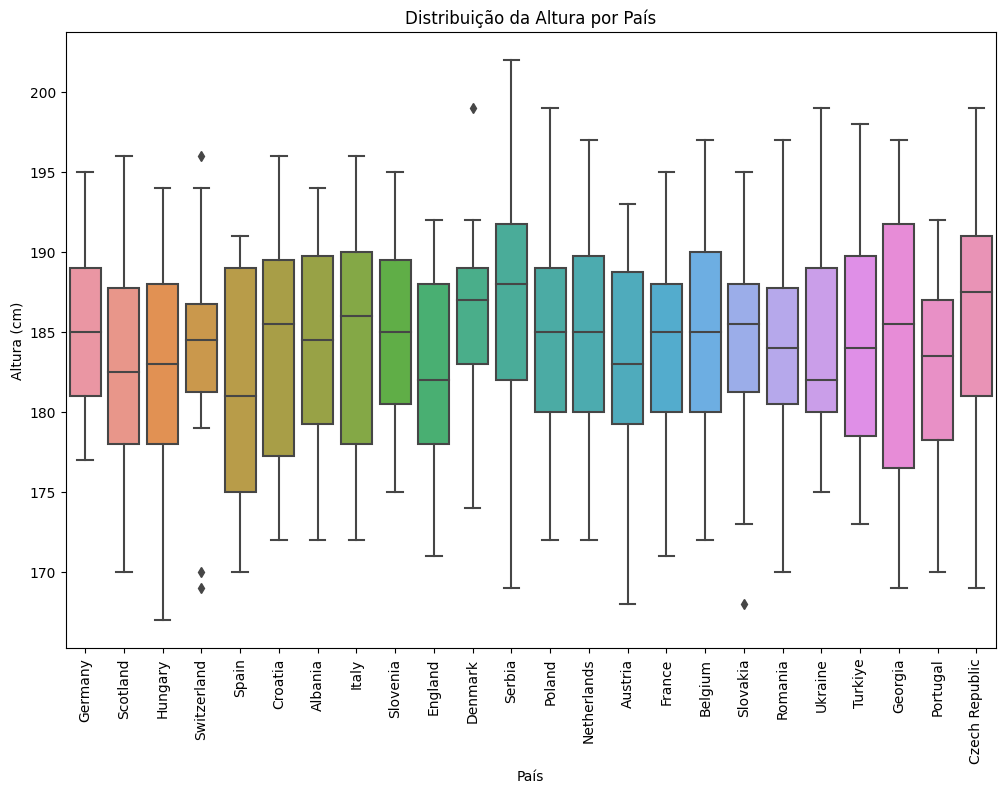

In [4]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='Country', y='Height', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição da Altura por País')
plt.xlabel('País')
plt.ylabel('Altura (cm)')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor leitura

# Mostrar o gráfico
plt.show()

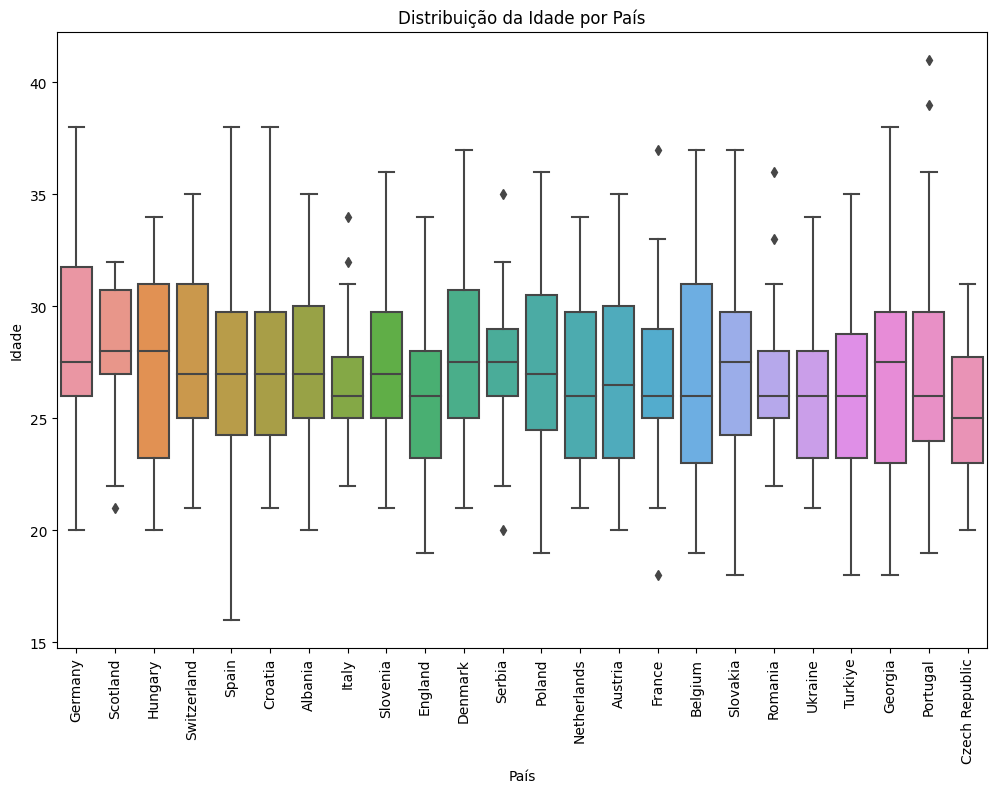

In [5]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='Country', y='Age', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição da Idade por País')
plt.xlabel('País')
plt.ylabel('Idade')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor leitura

# Mostrar o gráfico
plt.show()

**Avaliando as seleções com jogadores mais valiosos**

Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

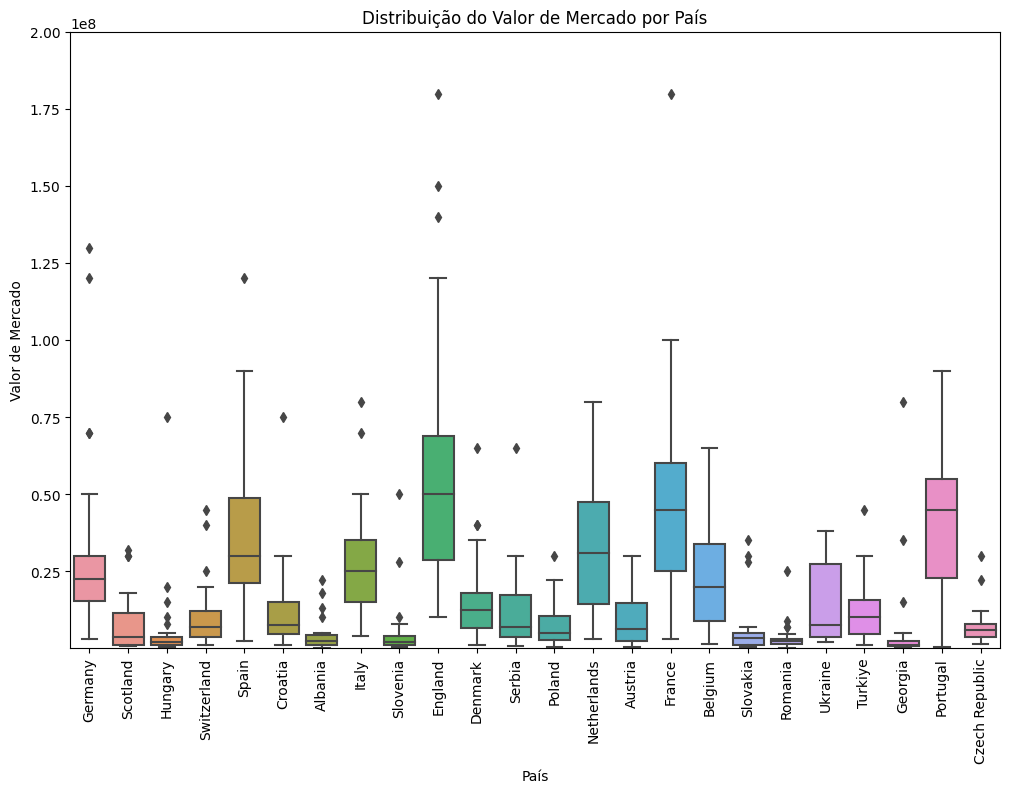

In [6]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='Country', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por País')
plt.xlabel('País')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor leitura

# Ajustar os limites do eixo y para valores inteiros
plt.ylim(100000, 200000000)  # Define o limite inferior como 0 e o superior como 200

# Mostrar o gráfico
plt.show()

**Avaliando as posições mais valorizadas**

OBS: Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

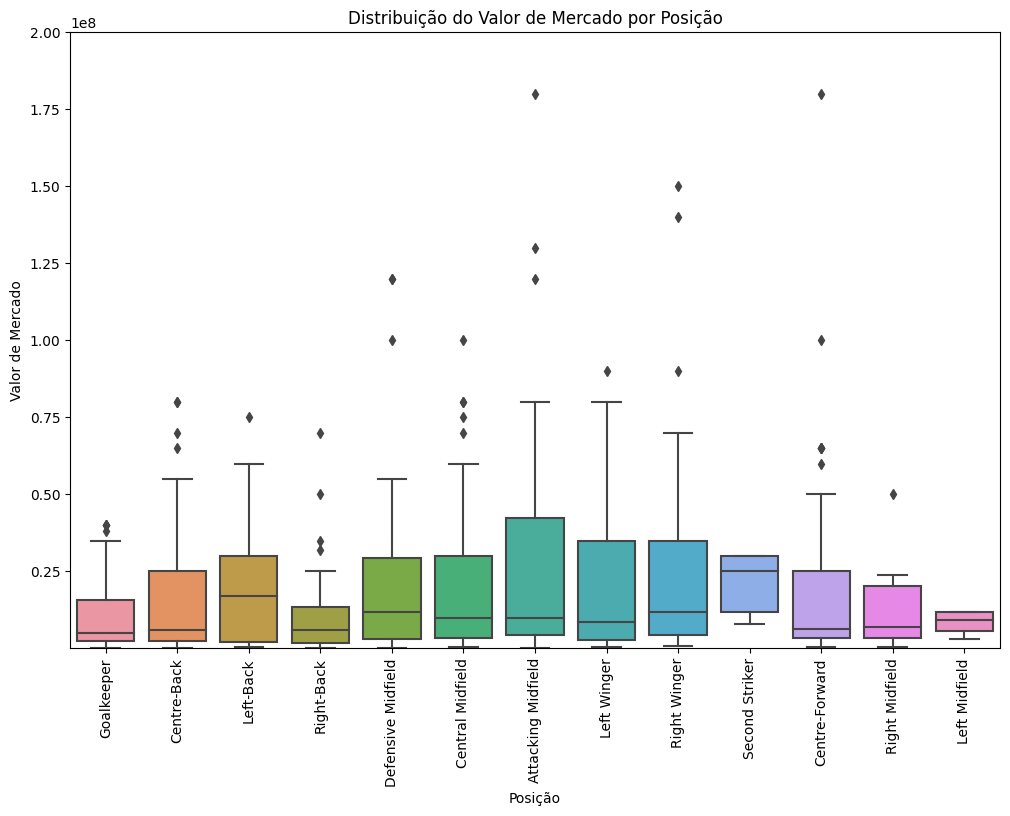

In [7]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='Position', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por Posição')
plt.xlabel('Posição')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor leitura

# Ajustar os limites do eixo y para valores inteiros
plt.ylim(100000, 200000000)  # Define o limite inferior como 0 e o superior como 200

# Mostrar o gráfico
plt.show()

**Avaliando as faixas etarias mais valorizadas**

OBS: Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


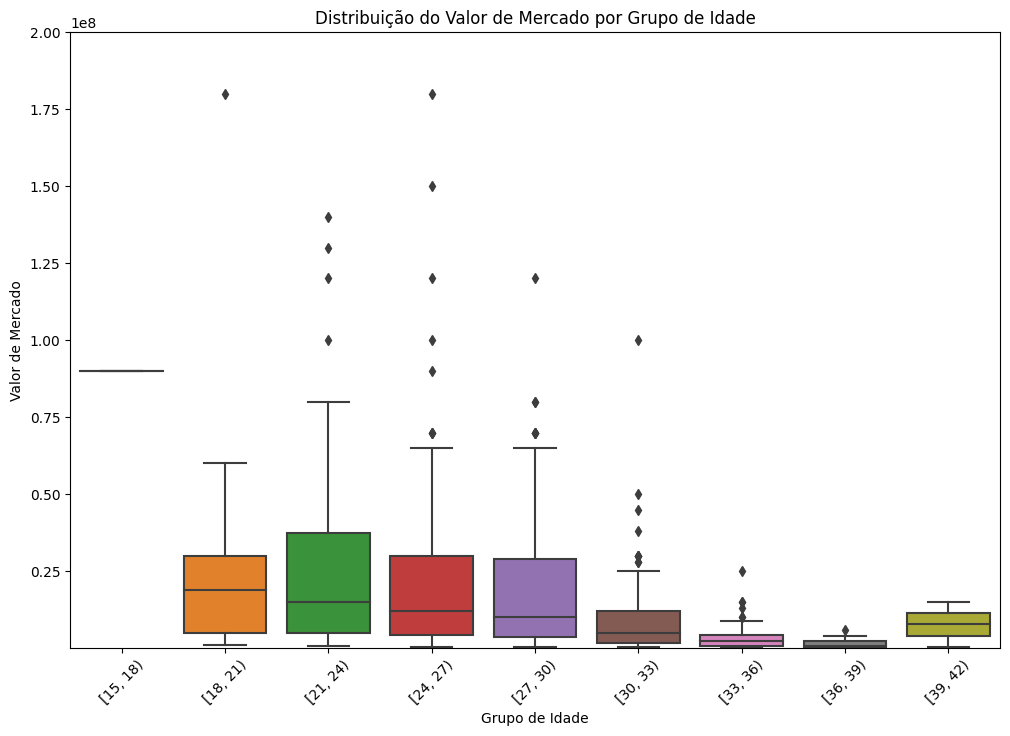

In [8]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma nova coluna para agrupar a variável Age em intervalos de três anos
data['AgeGroup'] = pd.cut(data['Age'], bins=range(15, 45, 3), right=False)

# Remover linhas com valores nulos em 'AgeGroup' ou 'MarketValue' (se houver)
data = data.dropna(subset=['AgeGroup', 'MarketValue'])

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='AgeGroup', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor leitura

# Ajustar os limites do eixo y para valores inteiros
plt.ylim(100000, 200000000)  # Define o limite inferior como 0 e o superior como 200

# Mostrar o gráfico
plt.show()

**Avaliando as faixar de altura mais valorizadas**

OBS: Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


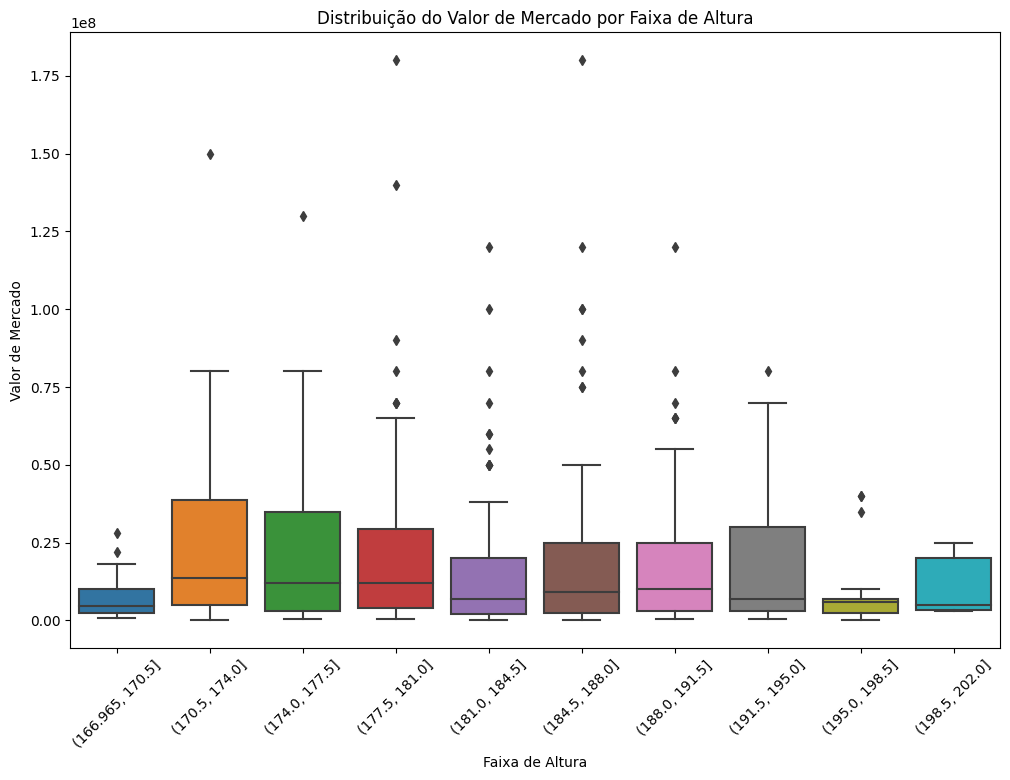

In [9]:
# Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma nova coluna para agrupar a variável Height em dez faixas
data['HeightGroup'] = pd.cut(data['Height'], bins=10)

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='HeightGroup', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por Faixa de Altura')
plt.xlabel('Faixa de Altura')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor leitura

# Mostrar o gráfico
plt.show()

**Avaliando a exepericencia por seleção mais valorizada**

OBS: Os valores maximos são de Jude Belliham e Lyllian Mbapee, avaliados aproximadamente em 175 milhões de euros

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


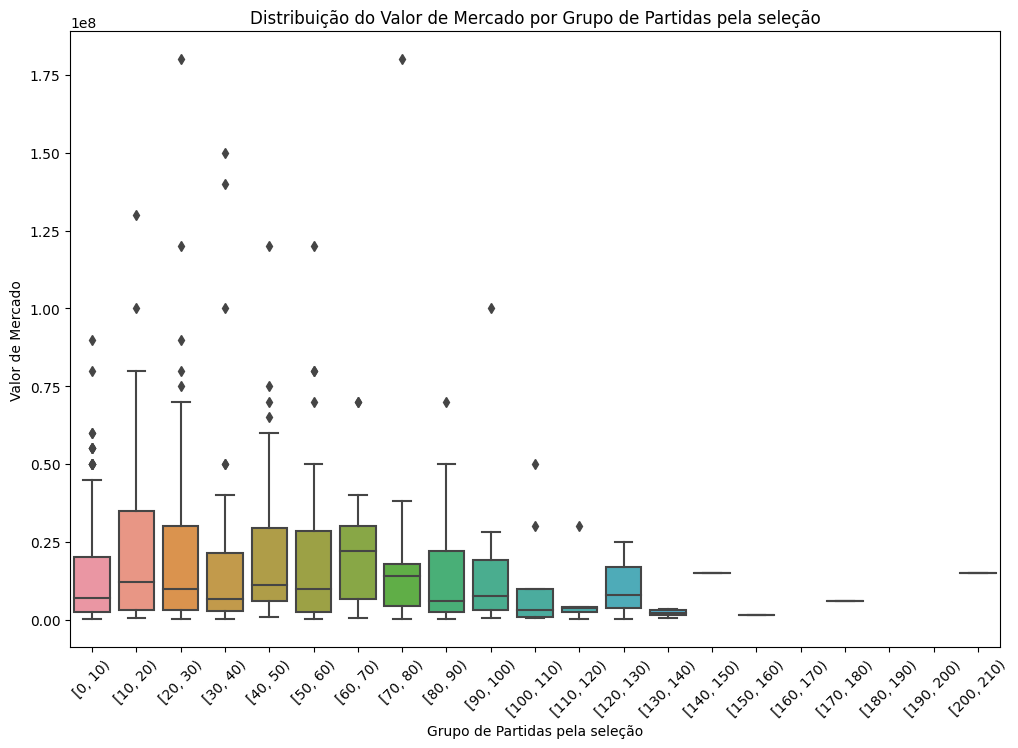

In [10]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma nova coluna para agrupar a variável Caps de 10 em 10
data['CapsGroup'] = pd.cut(data['Caps'], bins=range(0, data['Caps'].max() + 10, 10), right=False)

# Remover linhas com valores nulos em 'CapsGroup' ou 'MarketValue' (se houver)
data = data.dropna(subset=['CapsGroup', 'MarketValue'])

# Criar o gráfico de boxplot
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico
sns.boxplot(x='CapsGroup', y='MarketValue', data=data)

# Adicionar títulos e rótulos
plt.title('Distribuição do Valor de Mercado por Grupo de Partidas pela seleção')
plt.xlabel('Grupo de Partidas pela seleção')
plt.ylabel('Valor de Mercado')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor leitura

# Mostrar o gráfico
plt.show()